# Analysis for Part 1-A

 - To calculate the average growth of states over the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'
 
 - Plot the meean for each state after applying appropriate transformations

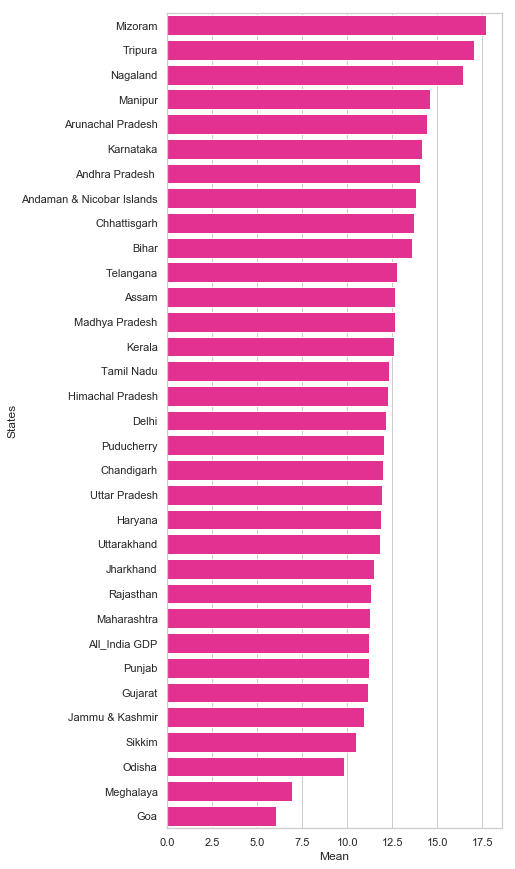

In [83]:
#Importing all the libraries that will be used in this python notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math


#loading all the data files

df = pd.read_csv("./GDP_Analysis_source/GSDP dataset.csv")

#df.head()

#Performing appropriate transformations on the data set

#Pivoting down the data
df1 = df.melt(id_vars=['Items  Description','Duration'])


df1=pd.pivot_table(df1,index = ['Items  Description','variable'],columns='Duration',values='value')

#Dropping certain columns and renaming others

df2 = df1.drop(columns =['2011-12','2012-13','2016-17'], axis=1)

df2 = df2.reset_index()
df2.rename(columns={'variable': 'States'}, inplace=True)

#Check for NaN values in the data set

#print(df2.isnull().sum())

#Calculating Mean and filling the NaN values with mean

m = df2.mean(axis=1)
for i, col in enumerate(df2):
    df2.iloc[:, i] = df2.iloc[:, i].fillna(m)
            
col = df2.loc[: , "2013-14":"2015-16"]

df2['Mean'] = col.mean(axis=1)

df3 = df2.copy()

df2.drop(df2.index[33:], inplace = True)

df4 = df2.sort_values('Mean', ascending = False)

f, ax = plt.subplots(figsize=(6, 15))

sns.set(style="whitegrid")

ax = sns.barplot(x = 'Mean', y = 'States', data = df4,color="deeppink");


### Insights from the above bar graph

- North Eastern states like Mizoram, Tripura, Nagaland and Manipur have shown the highest growth in the last few years

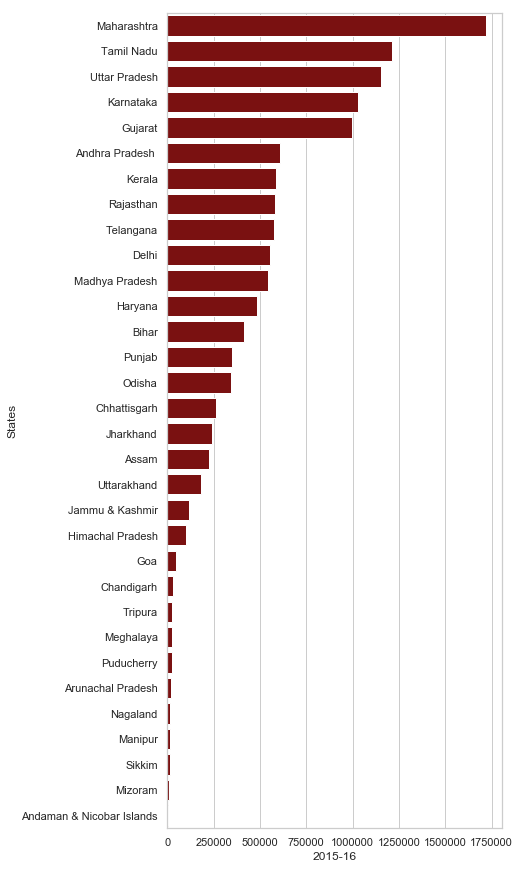

In [6]:
#Total GDP of the states  for the year 2015-2016

df3.drop(df3.index[0:34], inplace = True)

df5 = df3.sort_values('2015-16', ascending = False)

f, ax = plt.subplots(figsize=(6, 15))

sns.set(style="whitegrid")

ax = sns.barplot(x = '2015-16', y = 'States', data = df5,color="darkred"); 




## Insights from the bar graph plotted above

### Top 5 states based on GDP for the year 2015-16 are -

1. Maharashtra
2. Tamil Nadu
3. Uttar Pradesh
4. Karnataka
5. Gujarat

### Bottom 5 states based on GDP for the year 2015-16 are -

1. Andaman and Nicobar Islands
2. Mizoram
3. Sikkim
4. Manipur
5. Nagaland


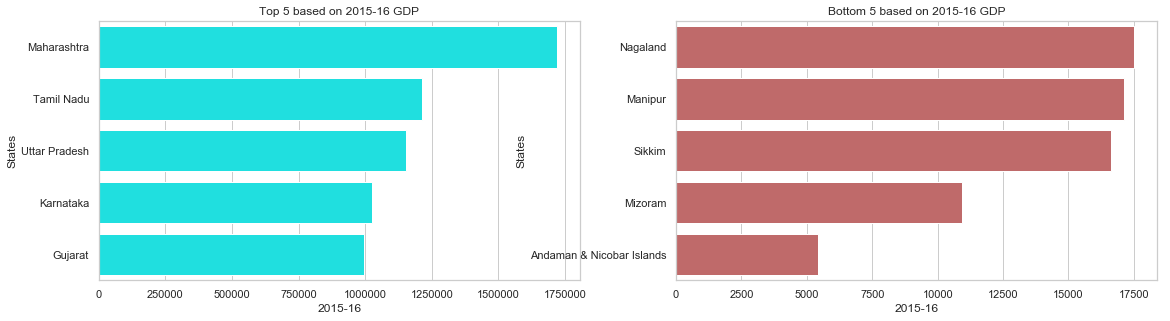

In [7]:
#Creating subplots to show top 5 and bottom 5 states based on 2015-16 GDP values

top5 = df5[0:5]

bottom5 = df5[-5:]

plt.subplot(1,2,1)

plt.title('Top 5 based on 2015-16 GDP')

sns.set(style="whitegrid")

ax = sns.barplot(x = '2015-16', y = 'States', data = top5,color="cyan"); 

plt.subplot(1,2,2)

plt.title('Bottom 5 based on 2015-16 GDP')

sns.set(style="whitegrid")

ax = sns.barplot(x = '2015-16', y = 'States', data = bottom5,color="indianred"); 

plt.subplots_adjust(bottom=0, left=.05, right=2.5, top=.90, hspace=500)


# Analysis for Part 1-B

-  To identify the top 5 and bottom 5 states based on GDP per capita for 2014-15
-  To find the ratio of highest per capita GDP to the lowest per capita GDP
-  To plot the percentage contribution of primary, secondary and tertiary sectors as a percentage of total GDP for all the states
-  To categorise the states into four categories based on GDP per capita (C1, C2, C3, C4 - C1 would have the highest per capita GDP, C4 the lowest)
    -  For each category, find the top 3/4/5 sub-sectors which contribute to approx. 80% of the GSDP of each category

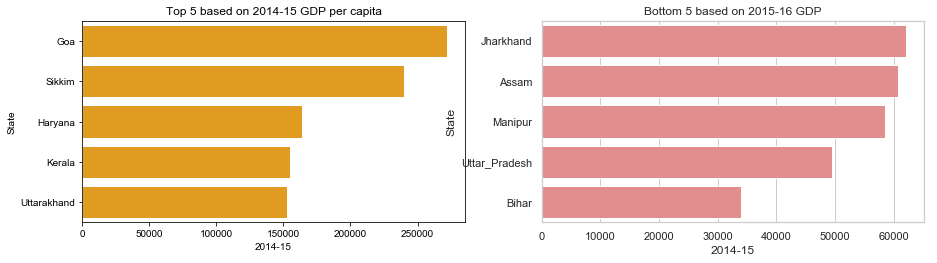

In [3]:
#Importing all the libraries that will be used in this python notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import glob


#loading all the data files

df1 = pd.read_csv("./GDP_Analysis_source/NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv",encoding = "ISO-8859-1")
df2 = pd.read_csv("./GDP_Analysis_source/NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv",encoding = "ISO-8859-1")
df3 = pd.read_csv("./GDP_Analysis_source/NAD-Assam-GSVA_cur_2015-16.csv",encoding = "ISO-8859-1")
df4 = pd.read_csv("./GDP_Analysis_source/NAD-Bihar-GSVA_cur_2015-16.csv",encoding = "ISO-8859-1")
df5 = pd.read_csv("./GDP_Analysis_source/NAD-Chhattisgarh-GSVA_cur_2016-17.csv",encoding = "ISO-8859-1")
df6 = pd.read_csv("./GDP_Analysis_source/NAD-Goa-GSVA_cur_2015-16.csv",encoding = "ISO-8859-1")
df7 = pd.read_csv("./GDP_Analysis_source/NAD-Gujarat-GSVA_cur_2015-16.csv",encoding = "ISO-8859-1")
df8 = pd.read_csv("./GDP_Analysis_source/NAD-Haryana-GSVA_cur_2016-17.csv",encoding = "ISO-8859-1")
df9 = pd.read_csv("./GDP_Analysis_source/NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv",encoding = "ISO-8859-1")
df10 = pd.read_csv("./GDP_Analysis_source/NAD-Jharkhand-GSVA_cur_2015-16.csv",encoding = "ISO-8859-1")
df11 = pd.read_csv("./GDP_Analysis_source/NAD-Karnataka-GSVA_cur_2015-16.csv",encoding = "ISO-8859-1")
df12 = pd.read_csv("./GDP_Analysis_source/NAD-Kerala-GSVA_cur_2015-16.csv",encoding = "ISO-8859-1")
df13 = pd.read_csv("./GDP_Analysis_source/NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv",encoding = "ISO-8859-1")
df14 = pd.read_csv("./GDP_Analysis_source/NAD-Maharashtra-GSVA_cur_2014-15.csv",encoding = "ISO-8859-1")
df15 = pd.read_csv("./GDP_Analysis_source/NAD-Manipur-GSVA_cur_2014-15.csv",encoding = "ISO-8859-1")
df16 = pd.read_csv("./GDP_Analysis_source/NAD-Meghalaya-GSVA_cur_2016-17.csv",encoding = "ISO-8859-1")
df17 = pd.read_csv("./GDP_Analysis_source/NAD-Mizoram-GSVA_cur_2014-15.csv",encoding = "ISO-8859-1")
df18 = pd.read_csv("./GDP_Analysis_source/NAD-Nagaland-GSVA_cur_2014-15.csv",encoding = "ISO-8859-1")
df19 = pd.read_csv("./GDP_Analysis_source/NAD-Odisha-GSVA_cur_2016-17.csv",encoding = "ISO-8859-1")
df20 = pd.read_csv("./GDP_Analysis_source/NAD-Punjab-GSVA_cur_2014-15.csv",encoding = "ISO-8859-1")
df21 = pd.read_csv("./GDP_Analysis_source/NAD-Rajasthan-GSVA_cur_2014-15.csv",encoding = "ISO-8859-1")
df22 = pd.read_csv("./GDP_Analysis_source/NAD-Sikkim-GSVA_cur_2015-16.csv",encoding = "ISO-8859-1")
df23 = pd.read_csv("./GDP_Analysis_source/NAD-Tamil_Nadu-GSVA_cur_2016-17.csv",encoding = "ISO-8859-1")
df24 = pd.read_csv("./GDP_Analysis_source/NAD-Telangana-GSVA_cur_2016-17.csv",encoding = "ISO-8859-1")
df25 = pd.read_csv("./GDP_Analysis_source/NAD-Tripura-GSVA_cur_2014-15.csv",encoding = "ISO-8859-1")
df26 = pd.read_csv("./GDP_Analysis_source/NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv",encoding = "ISO-8859-1")
df27 = pd.read_csv("./GDP_Analysis_source/NAD-Uttarakhand-GSVA_cur_2015-16.csv",encoding = "ISO-8859-1")


#Addin states column in each of the file

df1['State'] = 'Andhra Pradesh'
df2['State'] = 'Arunachal_Pradesh'
df3['State'] = 'Assam'
df4['State'] = 'Bihar'
df5['State'] = 'Chhattisgarh'
df6['State'] = 'Goa'
df7['State'] = 'Gujarat'
df8['State'] = 'Haryana'
df9['State'] = 'Himachal_Pradesh'
df10['State'] = 'Jharkhand'
df11['State'] = 'Karnataka'
df12['State'] = 'Kerala'
df13['State'] = 'Madhya_Pradesh'
df14['State'] = 'Maharashtra'
df15['State'] = 'Manipur'
df16['State'] = 'Meghalaya'
df17['State'] = 'Mizoram'
df18['State'] = 'Nagaland'
df19['State'] = 'Odisha'
df20['State'] = 'Punjab'
df21['State'] = 'Rajasthan'
df22['State'] = 'Sikkim'
df23['State'] = 'Tamil_Nadu'
df24['State'] = 'Telangana'
df25['State'] = 'Tripura'
df26['State'] = 'Uttar_Pradesh'
df27['State'] = 'Uttarakhand'

df28 = df1.append([df2, df3, df4, df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27], sort = False)

df28.reset_index(inplace=True)

df28['Item'] = df28['Item'].str.replace("*", "").str.replace("'", "")

df29 = df28.drop(columns = ['2011-12', '2012-13', '2013-14','2015-16','2016-17'], axis = 0)

df30 = df29[(df29.Item == 'Per Capita GSDP (Rs.)')]

df31 = df30.sort_values('2014-15', ascending = False)

df31.reset_index(inplace=True)

#Selecting top 5 and Bottom 5 territories

top_GDP_5 = df31[0:5]

bottom_GDP5 = df31[-5:]

plt.subplot(1,2,1)

plt.title('Top 5 based on 2014-15 GDP per capita')

sns.set(style="whitegrid")

ax = sns.barplot(x = '2014-15', y = 'State', data = top_GDP_5,color="orange"); 

plt.subplot(1,2,2)

plt.title('Bottom 5 based on 2015-16 GDP')

sns.set(style="whitegrid")

ax = sns.barplot(x = '2014-15', y = 'State', data = bottom_GDP5,color="lightcoral"); 

plt.subplots_adjust(bottom=0.2, left=.05, right=2.0, top=.90, hspace=500)



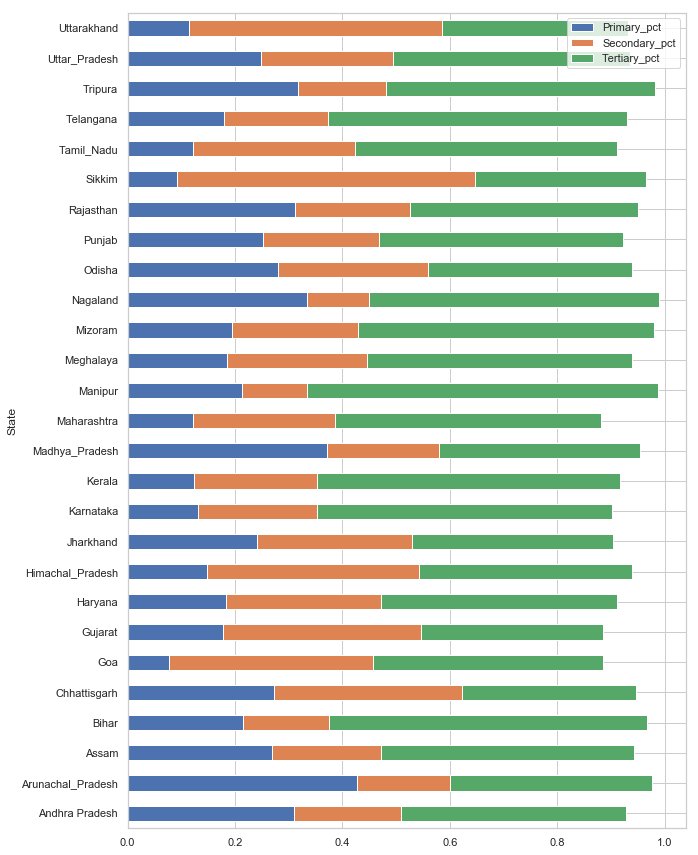

In [4]:
#Plotting Percentage contribution of Primary, Secondary and Tertiary over GSDP for all states 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

filter_list = ['Primary', 'Secondary','Tertiary','Gross State Domestic Product']

df33 = df29[df29.Item.isin(filter_list)]

df34 = df33.drop(columns = ['S.No.','index'], axis = 0)

df35 = df34.pivot_table(df34,index = 'State', columns = 'Item')

df35.reset_index()

df35


df35.columns = ['GSDP', 'Primary', 'Secondary', 'Tertiary']

df35['Primary_pct'] = df35['Primary']/df35['GSDP']

df35['Secondary_pct'] = df35['Secondary']/df35['GSDP']

df35['Tertiary_pct'] = df35['Tertiary']/df35['GSDP']

df36 = df35.drop(columns = ['GSDP', 'Primary', 'Secondary', 'Tertiary'], axis = 0)

plt.rcParams['figure.figsize'] = (10,15)

df36.plot (kind = 'barh',stacked=True)


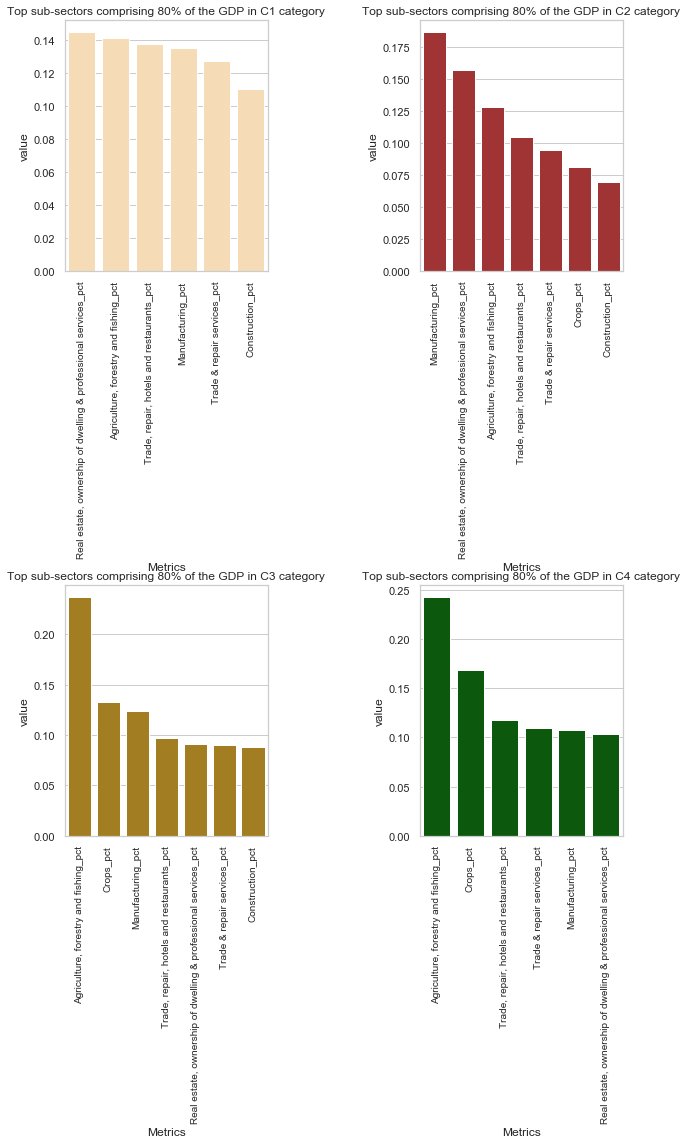

In [126]:
#Quintiling all the states based on GDP Per capita and aggregating based on sectors

df31['Category'] = pd.qcut(df31['2014-15'],[0,0.2,0.5,0.85,1],labels=["C4","C3","C2","C1"])

df37 = df29[(df29.Item != 'Primary')& (df29.Item != 'Secondary') & (df29.Item != 'Tertiary')&(df29.Item != 'TOTAL GSVA at basic prices')&(df29.Item != 'Taxes on Products')&(df29.Item != 'Subsidies on products')&(df29.Item != 'Per Capita GSDP (Rs.)')&(df29.Item != 'Population (00)')]

df38 = pd.merge(df37, df31[['State','Category']], how = 'left', on = ['State'])

df38 = df38.drop(columns = ['index', 'S.No.'], axis = 0)

#Roll up data at category level by aggregating on various sub-sectors

df40 = df38.groupby(['Category','Item']).sum()

df40 = df40.sort_values(['Category','2014-15'], ascending = False)

df40.reset_index()

df41 = pd.pivot_table(df40,index = ['Category'],columns = ['Item'],values = ['2014-15'])

df41.columns = ['Agriculture, forestry and fishing', 'Air transport', 'Communication & services related to broadcasting', 'Construction','Crops','Electricity, gas, water supply & other utility services','Financial services','Fishing and aquaculture','Forestry and logging','Gross State Domestic Product','Hotels & restaurants','Livestock','Manufacturing','Mining and quarrying','Other services', 'Public administration','Railways','Real estate, ownership of dwelling & professional services','Road transport','Services incidental to transport','Storage','Trade & repair services','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Water transport']

df42 = df41[['Agriculture, forestry and fishing', 'Air transport', 'Communication & services related to broadcasting', 'Construction','Crops','Electricity, gas, water supply & other utility services','Financial services','Fishing and aquaculture','Forestry and logging','Hotels & restaurants','Livestock','Manufacturing','Mining and quarrying','Other services', 'Public administration','Railways','Real estate, ownership of dwelling & professional services','Road transport','Services incidental to transport','Storage','Trade & repair services','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Water transport']]

#Calculating the percentage of each subsector within a category

df42['Agriculture, forestry and fishing_pct'] = df41['Agriculture, forestry and fishing']/df41['Gross State Domestic Product']

df42['Air transport_pct'] = df41['Air transport']/df41['Gross State Domestic Product']

df42['Communication & services related to broadcasting_pct'] = df41['Communication & services related to broadcasting']/df41['Gross State Domestic Product']

df42['Construction_pct'] = df41['Construction']/df41['Gross State Domestic Product']

df42['Crops_pct'] = df41['Crops']/df41['Gross State Domestic Product']

df42['Electricity, gas, water supply & other utility services_pct'] = df41['Electricity, gas, water supply & other utility services']/df41['Gross State Domestic Product']

df42['Financial services_pct'] = df41['Financial services']/df41['Gross State Domestic Product']

df42['Fishing and aquaculture_pct'] = df41['Fishing and aquaculture']/df41['Gross State Domestic Product']

df42['Forestry and logging_pct'] = df41['Forestry and logging']/df41['Gross State Domestic Product']

df42['Hotels & restaurants_pct'] = df41['Hotels & restaurants']/df41['Gross State Domestic Product']

df42['Livestock_pct'] = df41['Livestock']/df41['Gross State Domestic Product']

df42['Manufacturing_pct'] = df41['Manufacturing']/df41['Gross State Domestic Product']

df42['Mining and quarrying_pct'] = df41['Mining and quarrying']/df41['Gross State Domestic Product']

df42['Other services_pct'] = df41['Other services']/df41['Gross State Domestic Product']

df42['Public administration_pct'] = df41['Public administration']/df41['Gross State Domestic Product']

df42['Railways_pct'] = df41['Railways']/df41['Gross State Domestic Product']

df42['Real estate, ownership of dwelling & professional services_pct'] = df41['Real estate, ownership of dwelling & professional services']/df41['Gross State Domestic Product']

df42['Road transport_pct'] = df41['Road transport']/df41['Gross State Domestic Product']

df42['Services incidental to transport_pct'] = df41['Services incidental to transport']/df41['Gross State Domestic Product']

df42['Storage_pct'] = df41['Storage']/df41['Gross State Domestic Product']

df42['Trade & repair services_pct'] = df41['Trade & repair services']/df41['Gross State Domestic Product']

df42['Trade, repair, hotels and restaurants_pct'] = df41['Trade, repair, hotels and restaurants']/df41['Gross State Domestic Product']

df42['Transport, storage, communication & services related to broadcasting_pct'] = df41['Transport, storage, communication & services related to broadcasting']/df41['Gross State Domestic Product']

df42['Water transport_pct'] = df41['Water transport']/df41['Gross State Domestic Product']

df43 = df42[['Agriculture, forestry and fishing_pct','Air transport_pct','Communication & services related to broadcasting_pct','Construction_pct','Crops_pct','Electricity, gas, water supply & other utility services_pct','Financial services_pct','Fishing and aquaculture_pct','Forestry and logging_pct','Hotels & restaurants_pct','Livestock_pct','Manufacturing_pct','Mining and quarrying_pct','Other services_pct','Public administration_pct','Railways_pct','Real estate, ownership of dwelling & professional services_pct','Road transport_pct','Services incidental to transport_pct','Storage_pct','Trade & repair services_pct','Trade, repair, hotels and restaurants_pct','Transport, storage, communication & services related to broadcasting_pct','Water transport_pct']]

#Pivoting down data so that category wise, top 3/4/5 sub-sectors can be sorted

#df1 = df.melt(id_vars=['Items  Description','Duration'])
#df1=pd.pivot_table(df1,index = ['Items  Description','variable'],columns='Duration',values='value')


df44 = df43.reset_index()

df45 = df44.melt(id_vars=['Category'],var_name = 'Metrics')

df46 = df45.sort_values(['Category','value'],ascending = False)

df46.reset_index()

df47 = df46.loc[df46['Category']=='C1']

df48 = df46.loc[df46['Category']=='C2']

df49 = df46.loc[df46['Category']=='C3']

df50 = df46.loc[df46['Category']=='C4']

#Selecting top sectors which comprise approximately 80% of the total GDP

top_C1 = df47[0:6]

top_C2 = df48[0:7]

top_C3 = df49[0:7]

top_C4 = df50[0:6]

plt.subplot(2,2,1)

plt.title('Top sub-sectors comprising 80% of the GDP in C1 category')

sns.set(style="whitegrid")

ax = sns.barplot(x = 'Metrics', y = 'value', data = top_C1,color="navajowhite"); 

plt.xticks(fontsize=10, rotation=90)

plt.subplot(2,2,2)

plt.title('Top sub-sectors comprising 80% of the GDP in C2 category')

sns.set(style="whitegrid")

ax = sns.barplot(x = 'Metrics', y = 'value', data = top_C2,color="firebrick"); 

plt.xticks(fontsize=10, rotation=90)

plt.subplot(2,2,3)

plt.title('Top sub-sectors comprising 80% of the GDP in C3 category')

sns.set(style="whitegrid")

ax = sns.barplot(x = 'Metrics', y = 'value', data = top_C3,color="darkgoldenrod"); 

plt.xticks(fontsize=10, rotation=90)

plt.subplot(2,2,4)

plt.title('Top sub-sectors comprising 80% of the GDP in C4 category')

sns.set(style="whitegrid")

ax = sns.barplot(x = 'Metrics', y = 'value', data = top_C4,color="darkgreen"); 

plt.xticks(fontsize=10, rotation=90)

plt.subplots_adjust(wspace=0.75,hspace=1.25)




# Analysis for Part II

* To analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for the states. Choose an appropriate plot to conduct this analysis.


In [1]:
#Importing all the libraries that will be used in this python notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
%matplotlib inline


#loading all the data files

df = pd.read_csv("./GDP_Analysis_source/GSDP dataset.csv")

df1 = pd.read_csv("./GDP_Analysis_source/rs_session243_au570_1.1.csv")


#Performing appropriate transformations on the data set

#Pivoting down the data
df61 = df.melt(id_vars=['Items  Description','Duration'])
df61=pd.pivot_table(df61,index = ['Items  Description','variable'],columns='Duration',values='value')

#Dropping certain columns and renaming others

df62 = df61.drop(columns =['2011-12','2012-13','2016-17','2013-14','2015-16'], axis=1)

df62 = df62.reset_index()

df62.rename(columns={'variable': 'States'}, inplace=True)

df62.drop(df62.index[0:34],inplace = True)

#Renaming some of the states to keep it uniform between datasets

df62.replace(to_replace = 'Andhra Pradesh ',value = 'Andhra Pradesh', inplace = True)
df62.replace(to_replace = 'Chhattisgarh',value = 'Chhatisgarh', inplace = True)
df62.replace(to_replace = 'Jammu & Kashmir',value = 'Jammu and Kashmir', inplace = True)
df62.replace(to_replace = 'Uttarakhand',value = 'Uttrakhand', inplace = True)
df62.replace(to_replace = 'West Bengal1',value = 'West Bengal', inplace = True)
df62.replace(to_replace = "Andaman & Nicobar Islands",value = "A & N Islands", inplace = True)

df62.columns = ['Items Description', 'States','2014-15']

df62.columns.str.strip()

df2 = df1[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]

df2.columns = ['States','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']

df2.columns.str.strip()

#Merging both the data sets

df3 = pd.merge(df2.reset_index(),df62.reset_index(), on = 'States', how = 'right')

df4 = df3[['States','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015','2014-15']]

df4.columns = ['States','Primary Drop out rates','Upper Primary Drop out rates','Secondary Drop out rates','GDP Per State']

df5 = df4[['States','Primary Drop out rates','GDP Per State']]

df6 = df4[['States','Upper Primary Drop out rates','GDP Per State']]

df7 = df4[['States','Secondary Drop out rates','GDP Per State']]

#Finding the co-relation between the 4 variables

corr= df4.corr()

corr.style.background_gradient(cmap= sns.diverging_palette(220, 10, as_cmap=True))

#Plotting the co-relation between drop out rates and GDP per state



,Primary Drop out rates,Upper Primary Drop out rates,Secondary Drop out rates,GDP Per State
Primary Drop out rates,1,0.478059,0.179354,-0.329201
Upper Primary Drop out rates,0.478059,1,0.598658,-0.0392829
Secondary Drop out rates,0.179354,0.598658,1,-0.107587
GDP Per State,-0.329201,-0.0392829,-0.107587,1


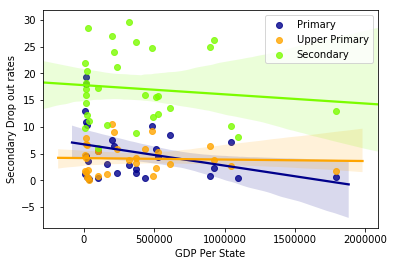

In [163]:
ax = sns.regplot(x = df4['GDP Per State'],y = df4['Primary Drop out rates'],color = 'Darkblue', label = 'Primary');

sns.regplot(x = df4['GDP Per State'],y = df4['Upper Primary Drop out rates'],color = 'Orange', label = 'Upper Primary',ax=ax);

sns.regplot(x = df4['GDP Per State'],y = df4['Secondary Drop out rates'],color = 'lawngreen', label = 'Secondary',ax=ax);

ax.legend()



### Insights from the scatter plot and correlation matrix plotted above

- From the graphs and matrix plotted above we can conclude that the drop out rates of Primary and Secondary level are negatievly co-related with the GDP of the states.

- The same can not be stated conclusively with the drop out rates of upper primary level vs GDP of the state as we can no relation between them

- This conclusion is based on the assumption that there are not other external factors affecting these two variables. However, it is also possible that there are other factors which lead to increase in drop out rates while increasing the GDP. Since no other data was taken into account, we have ignored other factors in our conclusion